In [60]:
import os
import requests #nos deja descargar toda la informacion de una página web
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
url = "https://github.com/resbaz/data/blob/master/births/US_births_1994-2003_CDC_NCHS.csv"
html = requests.get(url).content #pedimos que nos dé el código dela página

In [8]:
file = "birth.csv" #hacemos la variable que va a contener ese nombre o en este caso documento
os.path.isfile(file) #te dice si existe aún o no la variable que pides en el mismo directorio
birth_list = pd.read_html(html, header = 0)
birth = birth_list[-1]
birth.to_csv(file)
birth= pd.read_csv(file)

In [42]:
birth

birth_new = birth.rename(columns={'Unnamed: 0':'Entry','Unnamed: 0.1':'Entry2'})
birth_new

,Entry,Entry2,year,month,date_of_month,day_of_week,births
0,0,NaN,1994,1,1,6,8096
1,1,NaN,1994,1,2,7,7772
2,2,NaN,1994,1,3,1,10142
3,3,NaN,1994,1,4,2,11248
4,4,NaN,1994,1,5,3,11053
...,...,...,...,...,...,...,...
3647,3647,NaN,2003,12,27,6,8646
3648,3648,NaN,2003,12,28,7,7645
3649,3649,NaN,2003,12,29,1,12823
3650,3650,NaN,2003,12,30,2,14438


In [13]:
#data_birth_url = 'hhttps://raw.githubusercontent.com/resbaz/data/master/births/US_births_1994-2003_CDC_NCHS.csv'
#birth_table = pd.read_csv(data_birth_url)
#birth_table.head()

In [14]:
#birth_new.columns


Index(['Entry', 'Entry2', 'year', 'month', 'date_of_month', 'day_of_week',
       'births'],
      dtype='object')

In [15]:
#birth_new.index

RangeIndex(start=0, stop=3652, step=1)

In [31]:
birth_table= birth_new[birth_new.columns[2:7]]
#birth_table

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053
...,...,...,...,...,...
3647,2003,12,27,6,8646
3648,2003,12,28,7,7645
3649,2003,12,29,1,12823
3650,2003,12,30,2,14438


In [35]:
#vamos a filtrar los resultados

birth_new.loc[birth_new['year'] == 1994]

,Entry,Entry2,year,month,date_of_month,day_of_week,births
0,0,NaN,1994,1,1,6,8096
1,1,NaN,1994,1,2,7,7772
2,2,NaN,1994,1,3,1,10142
3,3,NaN,1994,1,4,2,11248
4,4,NaN,1994,1,5,3,11053
...,...,...,...,...,...,...,...
360,360,NaN,1994,12,27,2,11131
361,361,NaN,1994,12,28,3,12398
362,362,NaN,1994,12,29,4,12189
363,363,NaN,1994,12,30,5,12051


In [36]:
#estos son los concebidos en febrero
birth_new.loc[birth_new['month'] == 11]

,Entry,Entry2,year,month,date_of_month,day_of_week,births
304,304,NaN,1994,11,1,2,12316
305,305,NaN,1994,11,2,3,11736
306,306,NaN,1994,11,3,4,11703
307,307,NaN,1994,11,4,5,11956
308,308,NaN,1994,11,5,6,8826
...,...,...,...,...,...,...,...
3616,3616,NaN,2003,11,26,3,11767
3617,3617,NaN,2003,11,27,4,7224
3618,3618,NaN,2003,11,28,5,9271
3619,3619,NaN,2003,11,29,6,7913


In [72]:
birth_year = birth_new.pivot_table(index='year', columns='month',
                    aggfunc={'month':sum})

birth_year

month                                                     
month    1   2   3    4    5    6    7    8    9    10   11   12
year                                                            
1994     31  56  93  120  155  180  217  248  270  310  330  372
1995     31  56  93  120  155  180  217  248  270  310  330  372
1996     31  58  93  120  155  180  217  248  270  310  330  372
1997     31  56  93  120  155  180  217  248  270  310  330  372
1998     31  56  93  120  155  180  217  248  270  310  330  372
1999     31  56  93  120  155  180  217  248  270  310  330  372
2000     31  58  93  120  155  180  217  248  270  310  330  372
2001     31  56  93  120  155  180  217  248  270  310  330  372
2002     31  56  93  120  155  180  217  248  270  310  330  372
2003     31  56  93  120  155  180  217  248  270  310  330  372

In [73]:
#sns.pairplot(birth_year)

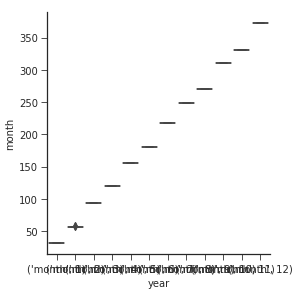

In [75]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot(data=birth_year, kind="box")
    g.set_axis_labels("year", "month");